In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [191]:
tickers = ['^GSPC', "^IXIC", # Indices (SP500, Nasqaq)
           'AAPL', 'MSFT',  
           'AMZN', "EBAY",
           'TSLA', # Cars
           "GOOG", "GOOGL", "BIDU", # Search engines + ads
           "FB", "SNAP", # Social networks
           # Hardware, AVGO=Broadcom, TXN=Texas instruments:
           "INTC", "AMD", "NVDA", "QCOM", "AVGO", "ASML", "TXN", 
           "ADBE",  # Software
           "ATVI", "EA", "TTWO", # Games, ATVI=Activision Blizzard, TTWO=Take Two Interactive
           "DELL", "IBM",  # Corporate OEMs
           "SBUX", "PEP"
          ]

In [192]:
start_date = '2019-01-01'
end_date = '2019-04-01'

In [193]:
panel_data = data.DataReader('INPX', 'yahoo', start_date, end_date)

In [194]:
ticker_data = {}
for ticker in tickers:
    try:
        df = data.DataReader(ticker, 'yahoo', start_date, end_date)
        df = df[["Close"]]
        df["prevClose"] = df["Close"].shift(1)
        df = df.dropna()
        # Percentage difference with previous day:
        df[ticker] = 100 * (df["Close"] - df["prevClose"]) / df["prevClose"]
        print(f"Got {len(df)} rows for {ticker}")
        df = df[[ticker]].T
        df.index.name = "ticker"
        df.columns = list(range(len(df.columns)))
        ticker_data[ticker] = df
    except Exception as e:
        print(f"Error getting data for {ticker}")


Got 61 rows for ^GSPC
Got 61 rows for ^IXIC
Got 61 rows for AAPL
Got 61 rows for MSFT
Got 61 rows for AMZN
Got 61 rows for EBAY
Got 61 rows for TSLA
Got 61 rows for GOOG
Got 61 rows for GOOGL
Got 61 rows for BIDU
Got 61 rows for FB
Got 61 rows for SNAP
Got 61 rows for INTC
Got 61 rows for AMD
Got 61 rows for NVDA
Got 61 rows for QCOM
Got 61 rows for AVGO
Got 61 rows for ASML
Got 61 rows for TXN
Got 61 rows for ADBE
Got 61 rows for ATVI
Got 61 rows for EA
Got 61 rows for TTWO
Got 61 rows for DELL
Got 61 rows for IBM
Got 61 rows for SBUX
Got 61 rows for PEP


In [195]:
ticker_data["AAPL"]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,-9.960737,4.26893,-0.222583,1.906312,1.698174,0.319617,-0.981801,-1.503706,2.046672,1.22166,...,-0.792472,0.873857,3.683032,-2.070836,-1.209106,-1.033174,0.89941,0.132647,0.651757,0.679131


In [196]:
df = pd.concat(ticker_data)
df.index = df.index.droplevel(level=0)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,-9.960737,4.268930,-0.222583,1.906312,1.698174,0.319617,-0.981801,-1.503706,2.046672,1.221660,...,-0.792472,0.873857,3.683032,-2.070836,-1.209106,-1.033174,0.899410,0.132647,0.651757,0.679131
ADBE,-3.949775,4.863239,1.357262,1.491755,1.181881,0.993931,-0.092527,-1.258685,3.325377,-0.169171,...,1.031969,-0.261126,1.709403,-1.699595,0.993487,1.265874,-1.223691,0.453611,1.123209,2.131421
AMD,-9.453004,11.436955,8.263156,0.875062,-2.698793,-2.228830,2.684907,-0.197340,0.741471,-3.189400,...,11.827957,-1.153843,8.521395,-5.449977,-1.516881,-1.078162,-3.114057,0.683006,1.835599,3.291537
AMZN,-2.524152,5.006398,3.435339,1.661232,0.171443,-0.192843,-0.945521,-1.423300,3.546237,0.550591,...,1.130784,2.010389,1.223522,-2.995173,0.537747,0.535434,-1.012471,0.437226,0.413323,1.877857
ASML,-5.515042,4.326933,2.284669,-0.736090,4.148824,-0.190276,-0.362829,-2.055303,0.340282,-1.224642,...,0.089172,0.172948,1.684630,-3.400906,-0.756324,0.515210,-1.724596,0.076062,2.090123,2.355753
ATVI,-3.550921,3.990294,2.819593,3.030930,1.721034,1.023011,-9.367084,1.611517,-0.951577,0.619131,...,3.224365,-0.560100,5.285959,-3.559670,0.234693,-1.170709,-1.959939,0.219680,-0.197282,3.492203
AVGO,-8.895108,0.982849,2.036616,-0.802584,4.324985,1.315578,0.420809,0.119722,2.240202,-1.867517,...,1.861558,-2.766362,1.982610,-1.398246,-0.167432,1.666893,-0.356865,1.047406,0.548361,1.689341
BIDU,-4.647145,4.033346,1.025169,0.491997,1.982868,1.026168,-1.330565,-1.854194,3.005578,1.083789,...,-0.257056,-0.328002,0.940240,-2.934161,0.089971,0.191750,-1.740433,-0.109558,0.450920,3.366689
DELL,-4.223255,1.972079,0.651889,1.187390,0.149349,-3.728164,-1.593267,-3.755345,0.490652,-0.906764,...,-0.082663,-1.340168,1.811166,-1.910723,-3.795127,2.792806,-2.292407,-1.077516,3.109628,2.964733


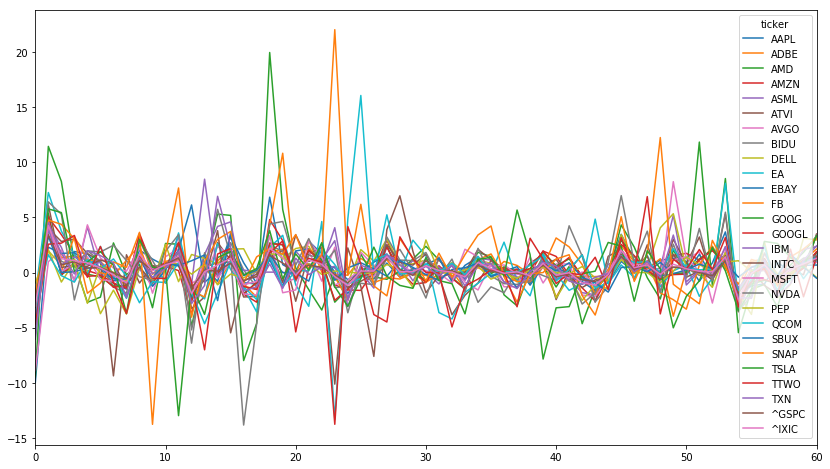

In [197]:
df.T.plot(figsize=(14, 8))

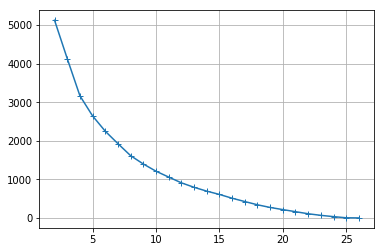

In [202]:
inertias = []
ks = list(range(2, len(df)))
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
plt.plot(ks, inertias, marker="+")
plt.grid()

Going with 12... it's the last sharp drop.

In [203]:
kmeans = KMeans(n_clusters=12, n_init=100)
clusters = kmeans.fit_predict(df)

In [204]:
dfc = df.copy()
dfc.insert(0, "cluster", clusters)
dfc

,cluster,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,3,-9.960737,4.268930,-0.222583,1.906312,1.698174,0.319617,-0.981801,-1.503706,2.046672,...,-0.792472,0.873857,3.683032,-2.070836,-1.209106,-1.033174,0.899410,0.132647,0.651757,0.679131
ADBE,3,-3.949775,4.863239,1.357262,1.491755,1.181881,0.993931,-0.092527,-1.258685,3.325377,...,1.031969,-0.261126,1.709403,-1.699595,0.993487,1.265874,-1.223691,0.453611,1.123209,2.131421
AMD,2,-9.453004,11.436955,8.263156,0.875062,-2.698793,-2.228830,2.684907,-0.197340,0.741471,...,11.827957,-1.153843,8.521395,-5.449977,-1.516881,-1.078162,-3.114057,0.683006,1.835599,3.291537
AMZN,3,-2.524152,5.006398,3.435339,1.661232,0.171443,-0.192843,-0.945521,-1.423300,3.546237,...,1.130784,2.010389,1.223522,-2.995173,0.537747,0.535434,-1.012471,0.437226,0.413323,1.877857
ASML,0,-5.515042,4.326933,2.284669,-0.736090,4.148824,-0.190276,-0.362829,-2.055303,0.340282,...,0.089172,0.172948,1.684630,-3.400906,-0.756324,0.515210,-1.724596,0.076062,2.090123,2.355753
ATVI,8,-3.550921,3.990294,2.819593,3.030930,1.721034,1.023011,-9.367084,1.611517,-0.951577,...,3.224365,-0.560100,5.285959,-3.559670,0.234693,-1.170709,-1.959939,0.219680,-0.197282,3.492203
AVGO,0,-8.895108,0.982849,2.036616,-0.802584,4.324985,1.315578,0.420809,0.119722,2.240202,...,1.861558,-2.766362,1.982610,-1.398246,-0.167432,1.666893,-0.356865,1.047406,0.548361,1.689341
BIDU,3,-4.647145,4.033346,1.025169,0.491997,1.982868,1.026168,-1.330565,-1.854194,3.005578,...,-0.257056,-0.328002,0.940240,-2.934161,0.089971,0.191750,-1.740433,-0.109558,0.450920,3.366689
DELL,11,-4.223255,1.972079,0.651889,1.187390,0.149349,-3.728164,-1.593267,-3.755345,0.490652,...,-0.082663,-1.340168,1.811166,-1.910723,-3.795127,2.792806,-2.292407,-1.077516,3.109628,2.964733


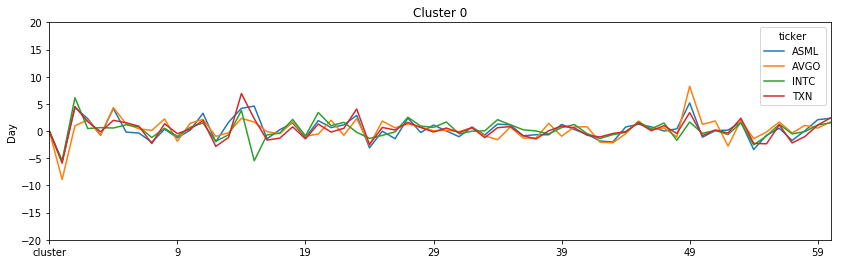

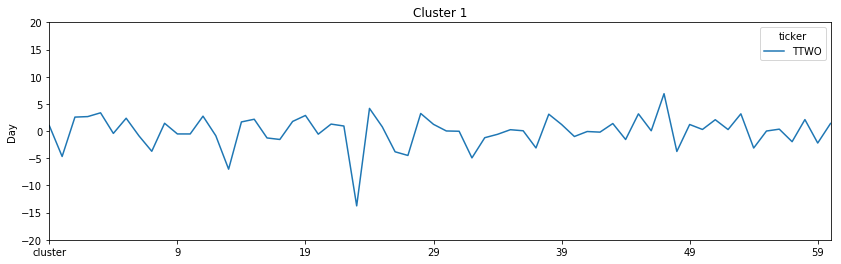

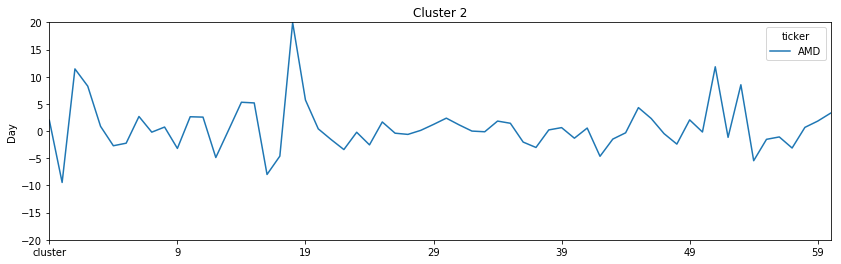

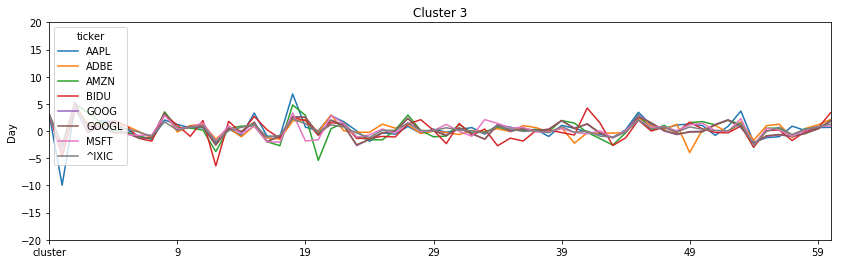

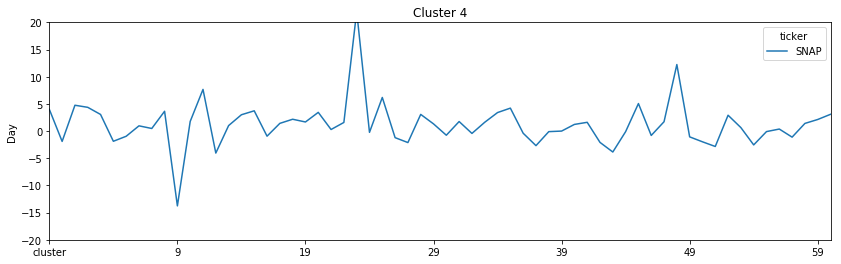

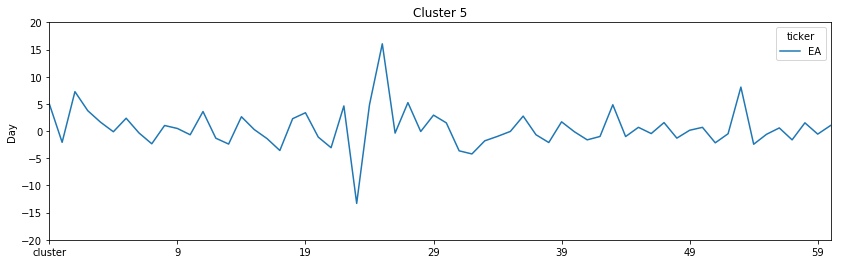

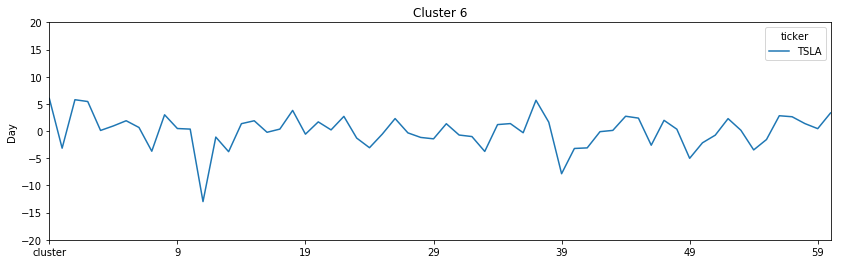

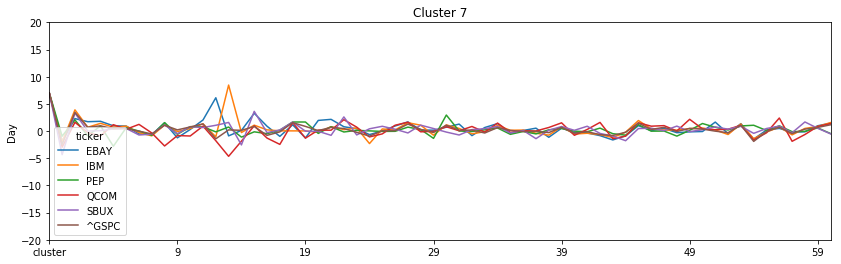

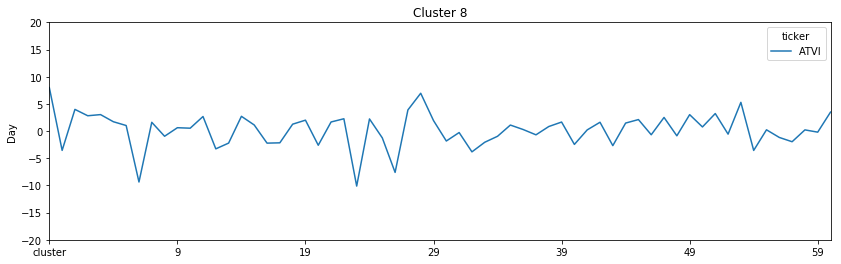

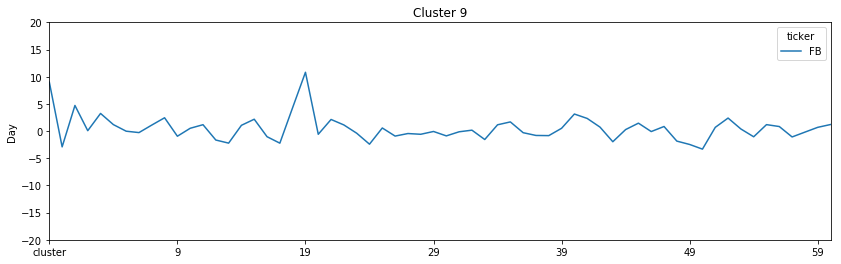

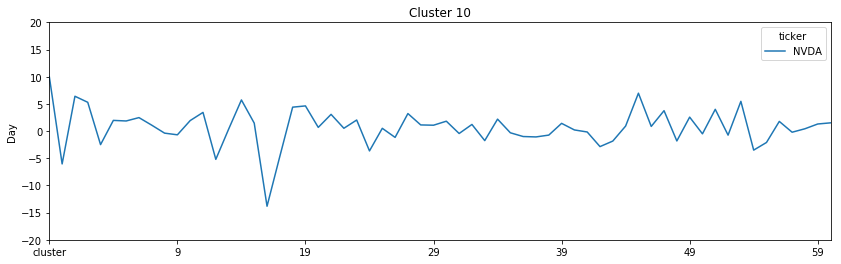

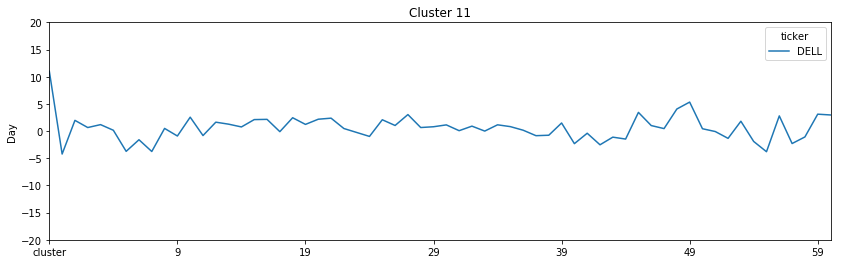

In [205]:
for cluster in sorted(set(dfc.cluster)):
    dfc[dfc["cluster"] == cluster].T.plot(figsize=(14, 4))
    plt.ylim(-20, 20)
    plt.ylabel("Percentage diff close with prev close")
    plt.ylabel("Day")
    plt.title(f"Cluster {cluster}")